**Mengimport Library**

In [1]:
# Library untuk megekstrak dan mengatur lokasi 
import zipfile
import os

# Library untuk machine learning Tensorflow
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from tensorflow.keras.layers import Dropout

# Library uuntuk  upload file Google Colabs dan plot
from keras.preprocessing import image
from google.colab import files
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

**Mengunduh dan Mengesktrak Dataset Rock Paper Scissors**

In [2]:
# Mengunduh dataset batu, gunting, kertas atau rockpapersiccors
!wget --no-check-certificate \
  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip \
  -O /tmp/rockpaperscissors.zip

--2021-07-14 00:17:49--  https://dicodingacademy.blob.core.windows.net/picodiploma/ml_pemula_academy/rockpaperscissors.zip
Resolving dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)... 52.239.197.36
Connecting to dicodingacademy.blob.core.windows.net (dicodingacademy.blob.core.windows.net)|52.239.197.36|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 322873683 (308M) [application/zip]
Saving to: ‘/tmp/rockpaperscissors.zip’

/tmp/rockpapersciss 100%[===================>] 307.92M  10.1MB/s    in 52s     

2021-07-14 00:18:42 (5.87 MB/s) - ‘/tmp/rockpaperscissors.zip’ saved [322873683/322873683]



In [3]:
# Melakukan ekstraksi pada file zip
import zipfile,os
locals_zip = '/tmp/rockpaperscissors.zip'
ref_zip = zipfile.ZipFile(locals_zip, 'r')
ref_zip.extractall('/tmp')
ref_zip.close()

**Mengatur Lokasi data Mengetahui informasi dari data yang akan digunakan**

In [4]:
# Mendefinisikan nama direktori
base_direktori = '/tmp/rockpaperscissors/rps-cv-images'
paper_dir = os.path.join("/tmp/rockpaperscissors/rps-cv-images/paper")
rock_dir = os.path.join("/tmp/rockpaperscissors/rps-cv-images/rock")
scissors_dir = os.path.join("/tmp/rockpaperscissors/rps-cv-images/scissors")

In [5]:
# Mengetahui jumlah data pada masing-masing sub-direktori
os.listdir(base_direktori)
jumlah_paper = len(os.listdir(paper_dir))
jumlah_rock = len(os.listdir(rock_dir))
jumlah_scissors = len(os.listdir(scissors_dir))

# Mencetak jumlah data pada masing-masing sub-direktori
print("Jumlah Data Paper Image    :",jumlah_paper)
print("Jumlah Data Rock Image     :",jumlah_rock)
print("Jumlah Data Scissors Image :",jumlah_scissors)

Jumlah Data Paper Image    : 712
Jumlah Data Rock Image     : 726
Jumlah Data Scissors Image : 750


**Data Preprocessing**

In [6]:
# Membuat sebuah objek ImageDataGenerator untuk data training dan data validation.
# Ukuran data validiation yang digunakan 40% dari dataset
val = 0.2

datagen_train = ImageDataGenerator(
    zoom_range = 0.25,
    shear_range = 0.25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode = "reflect",
    horizontal_flip = True,
    rotation_range = 40,
    rescale = 1./255,
    validation_split = val
)

datagen_validation = ImageDataGenerator(
    zoom_range = 0.25,
    shear_range = 0.25,
    width_shift_range=0.2,
    height_shift_range=0.2,
    fill_mode = "reflect",
    horizontal_flip = True,
    rotation_range = 40,
    rescale = 1./255,
    validation_split = val
)

In [7]:
# Menggunakan objek image data generator sebelumnya 
# untuk mempersiapkan data latih yang akan dipelajari oleh model

# Mengatur resolusi seluruh gambar menjadi 100x170 piksel
img_width = 150
img_height = 150
batch_size = 128

# Karena ini merupakan masalah klasifikasi 3 kelas maka menggunakan class_mode = 'categorical'
gen_train = datagen_train.flow_from_directory(
    base_direktori,
    target_size = (img_width, img_height),
    class_mode = "categorical",
    batch_size = batch_size,
    subset = "training"
)

gen_validation = datagen_validation.flow_from_directory(
    base_direktori,
    target_size = (img_width, img_height),
    class_mode = "categorical",
    batch_size = batch_size,
    subset = "validation"
)

Found 1751 images belonging to 3 classes.
Found 437 images belonging to 3 classes.


**Membangun Arsitektur CNN**

In [8]:
model = tf.keras.models.Sequential([
        tf.keras.layers.Conv2D(32, (3,3), activation = 'relu',input_shape = (img_width, img_height, 3)),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(64, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(128, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Conv2D(256, (3,3), activation = 'relu'),
        tf.keras.layers.MaxPooling2D(2,2),
        tf.keras.layers.Flatten(),
        tf.keras.layers.Dropout(0.5),
        tf.keras.layers.Dense(units = 512, activation = 'relu'),
        tf.keras.layers.Dense(units = 3, activation = 'softmax')
])

**Memanggil fungsi compile pada objek model, dan menentukan loss function serta optimizer.**

In [9]:
model.compile(optimizer='adam',
              loss='categorical_crossentropy',
              metrics = ['accuracy'])

model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 148, 148, 32)      896       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 74, 74, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 72, 72, 64)        18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 36, 36, 64)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 34, 34, 128)       73856     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 17, 17, 128)       0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 15, 15, 256)       2

**Proses Training Dataset menggunakan Callbacks**

In [10]:
class myCallback(tf.keras.callbacks.Callback):
  def on_epoch_end(self, epoch, logs={}):
    if(logs.get('accuracy')>0.86 and logs.get('val_accuracy')>0.86):
      print("\nAccuracy above 86%, finish training model!")
      self.model.stop_training = True

callbacks = myCallback()

myhistory = model.fit_generator(
    gen_train,
    steps_per_epoch = gen_train.samples // batch_size,
    validation_steps = gen_validation.samples // batch_size,
    epochs = 50,
    verbose = 1,
    validation_data = gen_validation,
    callbacks = [callbacks]
)

/usr/local/lib/python3.7/dist-packages/tensorflow/python/keras/engine/training.py:1940: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  warnings.warn('`Model.fit_generator` is deprecated and '


Epoch 1/50
13/13 [==============================] - 103s 8s/step - loss: 1.1175 - accuracy: 0.3611 - val_loss: 1.0461 - val_accuracy: 0.5417
Epoch 2/50
13/13 [==============================] - 99s 8s/step - loss: 1.0265 - accuracy: 0.4713 - val_loss: 0.9434 - val_accuracy: 0.5208
Epoch 3/50
13/13 [==============================] - 100s 8s/step - loss: 0.8630 - accuracy: 0.6112 - val_loss: 0.8008 - val_accuracy: 0.6719
Epoch 4/50
13/13 [==============================] - 102s 8s/step - loss: 0.6234 - accuracy: 0.7517 - val_loss: 0.5072 - val_accuracy: 0.7969
Epoch 5/50
13/13 [==============================] - 101s 8s/step - loss: 0.5020 - accuracy: 0.8065 - val_loss: 0.4321 - val_accuracy: 0.8359
Epoch 6/50
13/13 [==============================] - 100s 8s/step - loss: 0.4310 - accuracy: 0.8367 - val_loss: 0.3498 - val_accuracy: 0.8880
Epoch 7/50
13/13 [==============================] - 101s 8s/step - loss: 0.2998 - accuracy: 0.8842 - val_loss: 0.2194 - val_accuracy: 0.9375

Accuracy abov

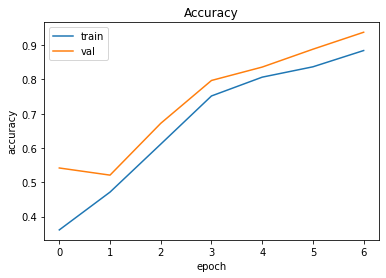

In [11]:
plt.plot(myhistory.history['accuracy'])
plt.plot(myhistory.history['val_accuracy'])
plt.title('Accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'upper left')
plt.show()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:6: MatplotlibDeprecationWarning: Unrecognized location 'right left'. Falling back on 'best'; valid locations are
	best
	upper right
	upper left
	lower left
	lower right
	right
	center left
	center right
	lower center
	upper center
	center
This will raise an exception in 3.3.
  


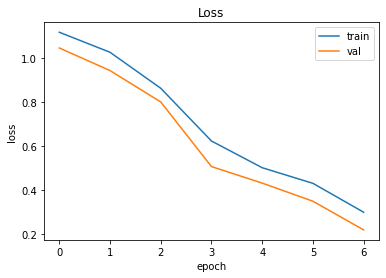

In [12]:
plt.plot(myhistory.history['loss'])
plt.plot(myhistory.history['val_loss'])
plt.title('Loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc = 'right left')
plt.show()

In [13]:
converter = tf.lite.TFLiteConverter.from_keras_model(model)
tflite_model = converter.convert()

with tf.io.gfile.GFile('model.tflite', 'wb') as f:
  f.write(tflite_model)

INFO:tensorflow:Assets written to: /tmp/tmprzlffixn/assets


In [14]:
!ls -la | grep 'model'

-rw-r--r-- 1 root root 27256604 Jul 14 00:33 model.tflite
